Given 3D vectors [40,120,60] and [60,50,90]

### Q1 draw out these vectors

C:\Users\Josiah\AppData\Local\Temp\ipykernel_5020\3628771064.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


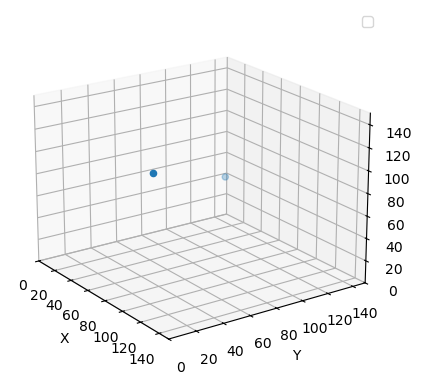

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Initialize the two vectors

vecArr = np.array([[40, 120, 60], [60, 50, 90]])

ax = plt.figure().add_subplot(projection='3d')

# Draw out the vectors

ax.scatter(vecArr[:, 0], vecArr[:, 1], vecArr[:, 2])


# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(0, 150)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

-----

### Q2 Calculate the euclidian, manhattan, cosine, and dot product distances between these vectors

### Manhattan distance

Manhattan distance = 
$$
    \sum_{i=1}^{n} \left| x_i - y_i \right|
$$

where $x$ and $y$ are vectors *NOT* dimensions.


In [9]:
manhat_dist = 0

for dim in range(len(vecArr[0])):
    manhat_dist += abs(vecArr[0, dim] - vecArr[1, dim])

print(manhat_dist)

120


In [7]:
#An alternate approach

a = vecArr[0]
b = vecArr[1]

np.linalg.norm((a - b), ord=1)

np.float64(120.0)

### Euclidian distance

Euclidian distance = 
$$
    \sqrt{\sum_{i=1}^{n} \left( x_i - y_i \right)^2}
$$

where $x$ and $y$ are vectors *NOT* dimensions.

In [11]:
L2 = 0
a = vecArr[0]
b = vecArr[1]

for dim in range(len(vecArr[0])):
    L2 += (vecArr[0, dim] - vecArr[1, dim])**2

L2 = np.sqrt(L2)

print(L2)

78.74007874011811


In [12]:
np.linalg.norm((a - b), ord=2)

np.float64(78.74007874011811)

### Cosine distance

Cosine distance = 
$$
    1 - \frac{A \cdot B}{|A| \cdot |B|}
$$

In [13]:
cosine = 1

cosine -= np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print(cosine)

0.17280694682183517


### Dot product

Dot product =
$$
    \sum_{i=1}^{n} x_i \cdot y_i
$$

In [14]:
dot = 0

for dim in range(len(vecArr[0])):
    dot += vecArr[0, dim] * vecArr[1, dim]

print(dot)

13800


In [15]:
#alternate method

np.dot(a,b)

np.int64(13800)

---

### Q3 Can you come up with a colour that has a smaller cosine distance from the first vector?

In [ ]:
colour1 = [40,120,60]
colour2 = [60,50,90]

colour3 = # ADD CODE HERE

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
ax.scatter(xs=colour1[0], ys=colour1[1], zs=colour1[2], zdir='z', label='Colour1')

ax.scatter(xs=colour2[0], ys=colour2[1], zs=colour2[2], zdir='z', label='Colour2')

ax.scatter(0, 0, 0, zdir='z', label='Origin', c='black')

ax.quiver(0,0,0,colour1[0],colour1[1],colour1[2], color='black', arrow_length_ratio=0.1)
ax.quiver(0,0,0,colour2[0],colour2[1],colour2[2], color='black', arrow_length_ratio=0.1)

#Add vector 3 to the diagram

# ADD CODE HERE

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(0, 150)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()